****
   


# <h1>About the problem</h1>    

   <p>A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood.<br>
    The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle. </p><br>
    
   <h3> What are the symptoms of heart attack?</h3>
    
   <b>The major symptoms of a heart attack are:</b> <br>
    -Chest pain or discomfort.<br>
    -Feeling weak, light-headed, or faint.<br>
    -Pain or discomfort in the jaw, neck, or back.<br>
    -Pain or discomfort in one or both arms or shoulders.<br>
    -Shortness of breath  <br><br><br>
    
   <b>Source:</b> <a href='https://www.cdc.gov/heartdisease/heart_attack.htm#:~:text=A%20heart%20attack%2C%20also%20called,main%20cause%20of%20heart%20attack.'>Click here!</a>
    
    
    
    

****

 ## <h2>Data Dictionary<h2>


<p>
<b>Age:</b> Age of the patient
<b>Sex:</b> Sex of the patient

<b>exang:</b> exercise induced angina (1 = yes; 0 = no)

<b>ca:</b> number of major vessels (0-3)

<b>cp:</b> Chest Pain type
    
Value 1: typical angina<br> 
Value 2: atypical angina<br> 
Value 3: non-anginal pain <br>
Value 4: asymptomatic trtbps : resting blood pressure (in mm Hg)

<b>chol:</b> cholestoral in mg/dl fetched via BMI sensor

<b>fbs:</b> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

<b>rest_ecg:</b> resting electrocardiographic results
    
Value 0: normal <br>
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br> 
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>
 <b>thalach:</b> maximum heart rate achieved <br>

<b>target:</b> 0= less chance of heart attack 1= more chance of heart attack</p> <br>

****

# <h2>EDA<h2>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os # Functions for interacting with the operating system


In [2]:
#Read the data

df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
#Check Missing values check

df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
#Check no of duplicated rows

df.duplicated().sum()

1

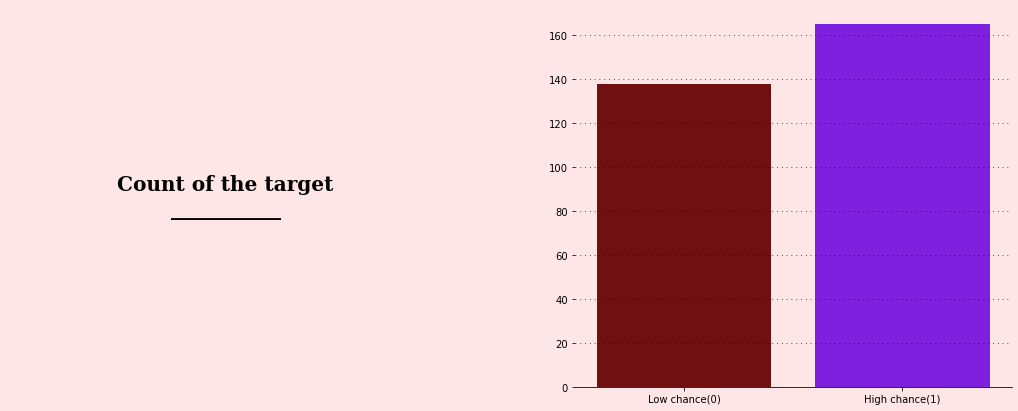

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

#background_color = "#ffe6e6"
background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 20,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chance(0)","High chance(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

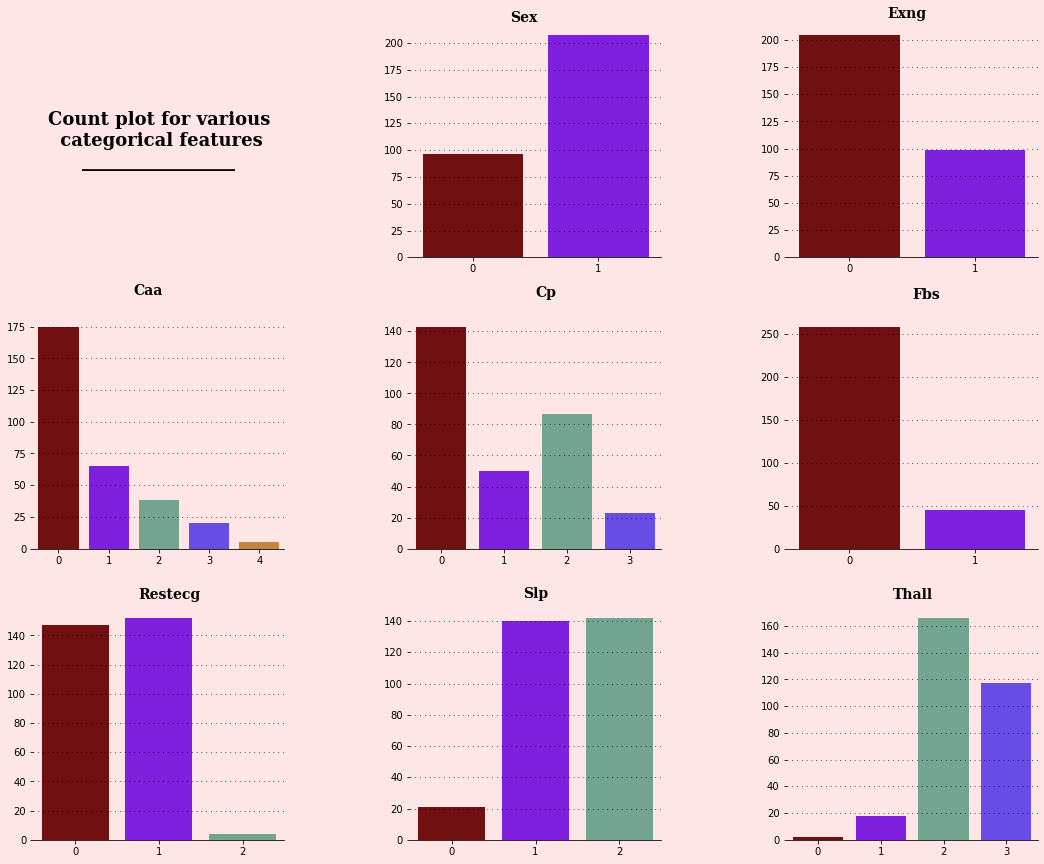

In [9]:
#plot histogram for each attribute

fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

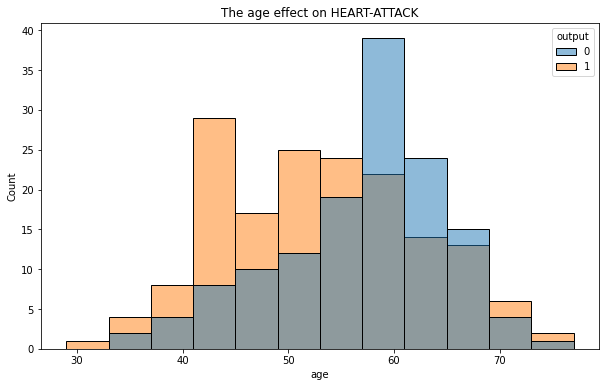

In [10]:
# Effect of the age on heart attack chance

plt.figure(figsize=(10,6))
sns.histplot(data = df, x = 'age', hue = 'output')
plt.title("The age effect on HEART-ATTACK")
plt.show()

1    207
0     96
Name: sex, dtype: int64


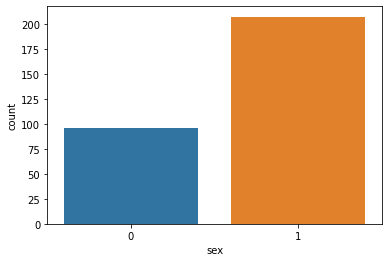

In [11]:
x=(df.sex.value_counts())
print(x)
p = sns.countplot(data=df, x="sex")
plt.show()

In [12]:
#Check the number of uniqe value in each attribute

dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [13]:
#Look for Correlations

corr_matrix = df.corr()
corr_matrix["output"].sort_values(ascending=
False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

<Figure size 720x720 with 0 Axes>

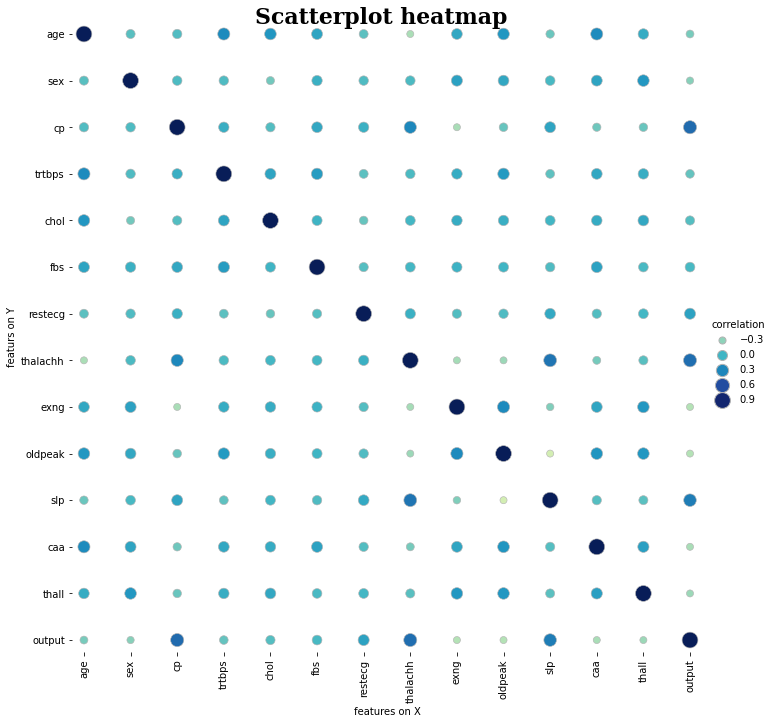

In [14]:
#Heat map to display Correlations

fig = plt.figure(figsize=(10,10))
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.3, .9),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

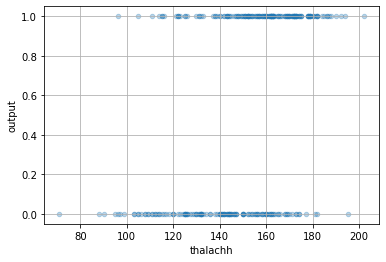

In [15]:
df.plot(kind="scatter", x="thalachh",
y="output",
 alpha=0.3, grid=True)
plt.show()

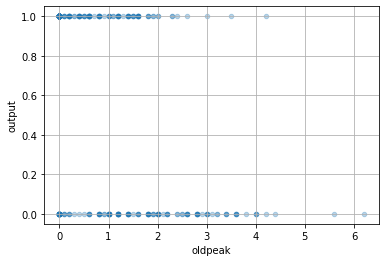

In [16]:
df.plot(kind="scatter", x="oldpeak",
y="output",
 alpha=0.3, grid=True)
plt.show()

****

# <h1>Data Preprocessing</h1>

## <h3>Drop duplicated rows</h3>

In [17]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(302, 14)

In [18]:
df = df.drop(['oldpeak'], axis=1)

## <h3>Faeture scaling</h3>

In [19]:
#Make copy of the data

Data = df

#Assign attributes and target
X = Data.drop(['output'], axis=1)
y = Data['output']

In [20]:
#Set numerical cols for transformation

num_col = ['age','trtbps','chol','thalachh']#,'oldpeak']

In [21]:
#Rescale the data by use StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[num_col] = scaler.fit_transform(X[num_col])
#X = scaler.fit_transform(X)

## <h2>Splitting the data</h2>

In [22]:
from sklearn.model_selection import train_test_split
#Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (241, 12)
The shape of X_test is        (61, 12)
The shape of y_train is       (241,)
The shape of y_test is        (61,)


****

# <h1>Modeling</h1>

In [23]:
# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## <h3>SVM</h3>

In [24]:
SV_clf = SVC(kernel='linear', C=0.5, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = SV_clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is", round(accuracy_score(y_test, y_pred)*100, 2), "%")

The test accuracy score of SVM is 80.33 %


In [25]:
#F1_score ,precision score and recall score

print("f1_score: ", f1_score(y_test, y_pred))
print("precision_score: ", precision_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred))

f1_score:  0.8064516129032259
precision_score:  0.8333333333333334
recall_score:  0.78125


****

## <h3>LogisticRegression</h3>

In [26]:
#Logistic Regression model


logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# predicting the values
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred2 = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print('The test accuracy score of Logistic is ', round(accuracy_score(y_test, y_pred2)*100, 2), "%")

The test accuracy score of Logistic is  80.33 %


In [27]:
#F1_score ,precision score and recall score

print("f1_score: ", f1_score(y_test, y_pred2))
print("precision_score: ", precision_score(y_test, y_pred2))
print("recall_score: ", recall_score(y_test, y_pred2))

f1_score:  0.8064516129032259
precision_score:  0.8333333333333334
recall_score:  0.78125


****

## <h3>K-NN</h3>

In [28]:
# K-nn model

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)

# predicting the test values
y_pred3 = knn_clf.predict(X_test)

# printing the test accuracy
print('The test accuracy score of k-nn is ', round(accuracy_score(y_test, y_pred3)*100, 2), "%")

The test accuracy score of k-nn is  86.89 %


In [29]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(KNeighborsClassifier(n_neighbors=3))
pipe.fit(X_train,y_train)

# predicting the test values
y_pred_pip = pipe.predict(X_test)

# printing the test accuracy
print('The test accuracy score of k-nn is ', round(accuracy_score(y_test, y_pred3)*100, 2), "%")

The test accuracy score of k-nn is  86.89 %


In [30]:
import pickle 

with open('trained_pipeline-1.0.pkl', 'wb') as f:
    pickle.dump(pipe, f)

In [31]:
#F1_score ,precision score and recall score

print("f1_score: ", f1_score(y_test, y_pred3))
print("precision_score: ", precision_score(y_test, y_pred3))
print("recall_score: ", recall_score(y_test, y_pred3))

f1_score:  0.870967741935484
precision_score:  0.9
recall_score:  0.84375


****

## <h3>RandomForest</h3>

In [32]:
#Random Forest model

RF_clf = RandomForestClassifier(n_estimators=14, random_state=42)#, max_features='sqrt')
RF_clf.fit(X_train, y_train)

# predicting the test values
y_pred4 = RF_clf.predict(X_test)

# printing the test accuracy
print('The test accuracy score of Random Forest is ', round(accuracy_score(y_test, y_pred4)*100, 2), "%")

The test accuracy score of Random Forest is  86.89 %


In [33]:
#F1_score ,precision score and recall score

print("f1_score: ", f1_score(y_test, y_pred4))
print("precision_score: ", precision_score(y_test, y_pred4))
print("recall_score: ", recall_score(y_test, y_pred4))

f1_score:  0.875
precision_score:  0.875
recall_score:  0.875


In [34]:
import pickle 

with open('RF_clf-1.0.pkl', 'wb') as f:
    pickle.dump(RF_clf, f)

In [35]:
#(binary: “1”, means “There is a risk”, “0” means “There is no risk”)

****